In [1]:
import numpy as np
import scipy as sp
from scipy import stats

import model as MVG

In [2]:
def imp(f):
    return np.loadtxt(open(f, "rb"), delimiter=",", skiprows=1)

def do(f,n):
    b = []
    for i in range(n):
        b.append(f())
    return np.array(b)

def inv(m):
    return np.linalg.inv(m)

def join(a,b):
    return np.concatenate((a,b))

def mp(f,a):
    b = []
    for i in range(np.shape(a)[0]):
        b.append(f(a[i]))
    return np.array(b)

def irange(a,b):
    return np.arange(a,b+1)

def sm(m,rs,cs):
    return m[np.ix_(rs,cs)]

def means_g(As, Bs, bs):
    return means[As] + sm(covs, As,Bs) @ inv(sm(covs, Bs,Bs)) @ (bs-means[Bs])

def covs_g(As,Bs,bs):
    sm(covs,As,As) - sm(covs,As,Bs) @ sm(covs,Bs,Bs) @ sm(covs,Bs,As)

def sample(As,Bs,bs,n):
    means = means_g(As,Bs,bs)
    covs = covs_g(As,Bs,bs)
    return do(lambda : sp.stats.multivariate_normal.rvs(means, covs),n)

def ftime_v(f_v):
    return f_v + len(Fsall)

def rcovs(r):
    es=np.random.uniform(0,1,r)
    es2 = es/np.mean(es)
    np.random.seed(514)
    covs = sp.stats.random_correlation.rvs(es2)
    return covs 
    
def rmeans(r):
    means = np.random.uniform(-1,1,r)
    return means

def exploit_time(Fs,fs):
    return min(means_g(Rsall, Fs, fs))

def feature_time(F,Fs,fs):
    return means_g([F], Fs, fs)[0]

def sample(As,Bs,bs,n):
    means = means_g(As,Bs,bs)
    covs = covs_g(As,Bs,bs)
    return do(lambda : sp.stats.multivariate_normal.rvs(means, covs),n)

def ftime_v(f_v):
    return f_v + len(Fsall)

#mutli-variate gaussian monte carlo n-greedy
def time_left(Fs, fs, ns):
    #x is the exploit time
    choice = -1
    x = exploit_time(Fs,fs)#expected runtimes given info
    if ns==[]:
        return x,choice #just run a solver
    #for every feature you could calculate
    for F_opt in np.setdiff1d(Fsall,Fs):
        #compute the expected feature compute time
        y = feature_time(ftime_v(F_opt), Fs,fs)#expected feature compute time given info
        #sample some points
        frs = sample([F_opt],Fs,fs,ns[0])#random outcomes for feature value, compute time
        s = 0
        #compute their time left
        for fr in frs:
            t,_ = time_left(join(Fs,[F_opt]),join(fs,[fr]),ns[1:]) #act like the random outcomes happened
            s += t 
        #store the average of the points + feature time
        m = s/len(frs) + y
        if m < x:
            choice = F_opt 
            x = m
    #return the min of exploit time and feature times
    return x, choice

def select(f,a):
    b = []
    for i in range(np.shape(a)[0]):
        if(f(a[i])):
            b.append(a[i])
    return np.array(b)

In [86]:
def filt(a):
    b = []
    for v in a:
        if v>0:
            b.append(v)
    if len(b)==0:
        b.append(1200)
    return np.array(b)

In [362]:
#mutli-variate gaussian monte carlo n-greedy
def time_left_2(Ks, ks, ns, c_samp):
    #try:
        n_x = ns[0][0]
        n_ft = ns[0][1]
        n_branch = ns[0][2]

        #sample n_x Rts from the posterior
        #global Ws
        #Ws=Ks
        #print(Ks)
        samp_x = c_samp(Rts,Ks,ks,n_x)
        e_xs = np.mean(samp_x, axis=0)
        best_i = np.argmin(e_xs)
        best_t = e_xs[best_i]
        best_type = "exploit"  
        #print(best_t)

        if n_branch==0:
            return best_t,best_i,best_type #just run a solver
        #for every feature you could calculate
        for Ft_opt in np.sort(np.setdiff1d(Fts,Ks)):
            Fv_opt = Ft_v[Ft_opt]
            #sample feature times
            samp_ft = c_samp([Ft_opt],Ks,ks,n_ft)
            e_ft = np.mean(samp_ft)

            #sample features and runtimes
            samp_fvft = c_samp(join(Fv_opt,[Ft_opt]),Ks,ks,n_branch)

            ts = []
            for fvft in samp_fvft:
                FVFT = join(Fv_opt,[Ft_opt])

                best_t,_,_ = time_left_2(join(Ks,FVFT),join(ks,fvft),ns[1:],c_samp)
                ts.append(best_t)
            e_t = np.mean(ts)
            
            
            t_t = e_ft + e_t
            if t_t < best_t:
                best_t = t_t
                best_i = Ft_i[Ft_opt]
                best_type = "explore" 
            #print(best_t)
        #return the min of exploit time and feature times
        return best_t,best_i,best_type
    #except:
        #print("error")
        #return 1201,0,"exploit"

In [30]:
mins = np.min(data_all,axis=0)
maxs = np.max(data_all,axis=0)

In [42]:
        def c_samp(As,Bs,bs,n):
            s1 = mixture_model.sample_from_conditional(model,Bs,bs,As,n)
            s2 = np.exp(s1)
            minsa = mins[As]
            maxsa = maxs[As]
            lb = 0.1
            ub = 1
            s3 = (s2-lb) * 1/(ub-lb) * (maxsa-minsa) + minsa
            return s3

In [103]:
(data_all[0] < 0).any()

True

In [122]:
data_all_nn = []
i=0
for r in data_all:
    if (r[Rts]>0).all() and (r[Fts]>0).all():
        data_all_nn.append(r)
    else
data_all_nn = np.array(data_all_nn)

In [124]:
mp(logify,data)(data_all_nn)

703

In [211]:
np.mean(c_samp([10],np.array([],dtype=int),np.array([],dtype=int),10))

c:\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


inf

In [213]:
np.max(data_all_nn[:,10])

1201.0

In [208]:
a = MVG.MVGModel(data_all_nn)
c_samp2 = lambda As,Bs,bs,n : a.sample_from_conditional(Bs,bs,As,n)

In [200]:
a = MVG.MVGModel(mp(logify,data_all_nn))
        
def c_samp(As,Bs,bs,n):
    #print(As)
    #print(Bs)
    #print(bs)
    bs2 = []
    for i in range(len(bs)):
        if Bs[i] in Fts or Bs[i] in Rts:
            bs2.append(np.log(bs[i]))
        else:
            bs2.append(bs[i])
    bs2 = np.array(bs2)

    rsamp = a.sample_from_conditional(Bs,bs2,As,n)
    igs = []
    for i in range(len(As)):
        if As[i] in Rts or As[i] in Fts:
            igs.append(np.exp(rsamp[:,i]))
        else:
            igs.append(rsamp[:,i])
    return np.transpose(igs)

In [250]:
def logify(r):
    r2 = []
    for i in range(len(r)):
        if i in Rts or i in Fts:
            r2.append(np.log(max(0.1,r[i])))
        else:
            r2.append(r[i])
    return np.array(r2)
            

In [442]:
data_all_r = imp(r"C:\Users\DFCTech\Downloads\SAT_data\cs159\SATRAND12S_data\SATRAND12Sft_and_slv_times_with_vals.csv")[:,1:]


In [445]:
np.mean(data_all_r[Rts])

290.38132986901076

In [441]:
#uses m, ns, data
def get_model(data,ns,m):
    if m == "MVG":
        a = MVG.MVGModel(data)
        def c_samp(As,Bs,bs,n):
            global s1
            s1 = a.sample_from_conditional(Bs,bs,As,n)
            
            global s2
            s2 = []
            for i in range(len(As)):
                if As[i] in Rts or As[i] in Fts:
                    s2.append(mp(lambda v: max(v,0), s1[:,i]))
                else:
                    s2.append(s1[:,i])
            #return s1
            return np.transpose(s2)
        
    if m =="logMVG":
        a = MVG.MVGModel(mp(logify,data))
        
        def c_samp(As,Bs,bs,n):
            #print(As)
            #print(Bs)
            #print(bs)
            bs2 = []
            for i in range(len(bs)):
                if Bs[i] in Fts or Bs[i] in Rts:
                    bs2.append(np.log(bs[i]))
                else:
                    bs2.append(bs[i])
            bs2 = np.array(bs2)
            
            rsamp = a.sample_from_conditional(Bs,bs2,As,n)
            igs = []
            for i in range(len(As)):
                if As[i] in Rts or As[i] in Fts:
                    igs.append(np.exp(rsamp[:,i]))
                else:
                    igs.append(rsamp[:,i])
            return np.transpose(igs)
        
    if m == "MMVG":
        import mixture_model
        mins = mp(min,data_all)
        
        model = pickle.load(open("./GaussianMixtureSATALL.pickle", "rb"))
        
        def c_samp(As,Bs,bs,n):
            s1 = mixture_model.sample_from_conditional(model,Bs,bs,As,n)
            s2 = np.exp(s1)
            minsa = mins[As]
            maxsa = maxs[As]
            lb = 0.1
            ub = 1
            s3 = (s2-lb) * 1/(ub-lb) * (maxsa-minsa) + minsa
            return s3
            
        
    def f(Ks,ks):
        best_t,best_i,best_type = time_left_2(Ks,ks,ns,c_samp)
        return best_type, best_i 
    return f

def run_model(truth, model,verbose):
    try:
        global i
        print("running")
        moves = []
        Bs = np.array([],dtype=int)
        bs = []
        timesofar = 0
        while True:
            typ, i = model(Bs,bs)
            moves.append(i)
            if typ == "explore":
                Fv = Fvs[i]
                Ft = Fts[i]
                fv = truth[Fv]
                ft = truth[Ft]

                timesofar += ft
                Bs = np.concatenate((Bs,Fv,[Ft]))
                bs = np.concatenate((bs,fv,[ft]))
            if typ == "exploit":
                timesofar += truth[Rts[i]]
                if verbose:
                    return timesofar, moves
                else:
                    return timesofar
    except:
        return "error"
data_all = imp(r"C:\Users\DFCTech\Downloads\SAT_data\cs159\SATALL12S_data\SATALL12Sft_and_slv_times_with_vals.csv")[:,1:]
data_all = np.where(data_all==1201, 1201, data_all)
#np.random.shuffle(data_all)

Rts = irange(0,30)
Fts = [37,52,73,84,90,109,128,140,152,155]
Fts2 = np.concatenate(([30],Fts))
Fvs = []
for i in range(len(Fts2)-1):
    Fvs.append(irange(Fts2[i]+1,Fts2[i+1]-1))
Ft_v = {}
Ft_i = {}
for i,t,v in zip(range(len(Fts)),Fts,Fvs):
    Ft_v[t] = v
    Ft_i[t] = i

In [367]:
def results(model, test_data,verbose):
    global i
    i = 0
    return mp(lambda truth : run_model(truth, model,verbose), test_data)

In [335]:
xs = range(len(Rts))

In [333]:
ys1 = mp(lambda i : np.mean(mp(lambda r : np.sort(r)[i],data_all[:,Rts])), range(len(Rts)))

In [613]:
ys2 = mp(lambda i : np.sort(np.mean(data_all[:,Rts],axis=0))[i],range(len(Rts)))

In [619]:
np.argmin(np.mean(data_all[:,Rts],axis=0))

18

In [616]:
np.mean(data_all[:,Rts[1]])

675.6346592317224

In [630]:
data_eugene = imp(r"C:\Users\DFCTech\Downloads\SATALL12S_for_ajay (1).csv")#[:,1:]


In [657]:
Rts[18]

18

In [638]:
np.max(fr)

2862.1099999999997

In [656]:
sperf = data_all[:,Rts[18]]#data_eugene[:,-1]
sperf2 = []
i=0
n=0
op=0
for v in sperf:
    n+=1
    if v>1200:
        op+=1
        #sperf2.append(1201)
    else:
        i+=1
        sperf2.append(v)

print(np.mean(sperf))
print(np.mean(sperf2))
print(i/n)

410.24448574969017
150.56427983539092
0.7527881040892194


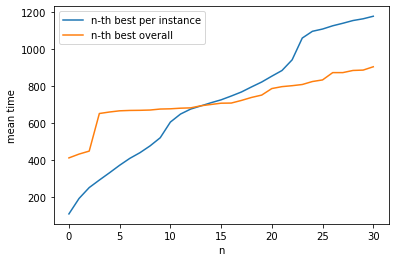

In [614]:
plt.plot(xs,ys1,label="n-th best per instance")
plt.plot(xs,ys2,label="n-th best overall")
plt.xlabel("n")
plt.ylabel("mean time")
plt.legend()
plt.savefig("comparison.svg")
plt.show()

In [560]:
len(ys1)
ys2

array([ 369.20271953,  429.18725698,  449.2851138 ,  461.01751468,
        486.86449046,  561.6785837 ,  593.80759178,  602.5405793 ,
        606.13716373,  669.35701982,  886.41470631, 1042.16266226,
       1042.64301689, 1060.28530543, 1064.45095154, 1078.78624963,
       1087.59113877, 1089.87387592, 1106.31457636, 1120.07192217,
       1125.99655213, 1127.37114097, 1129.47891336, 1134.92900661,
       1136.09996035, 1138.20546623, 1148.04514905, 1152.78048605,
       1156.46502056, 1161.44941777, 1184.99270338])

In [7]:
import mixture_model
import pickle
model = pickle.load(open("./GaussianMixtureSATALL.pickle", "rb"))
c_samp = lambda As,Bs,bs,n : mixture_model.sample_from_conditional(model,Bs,bs,As,n)

C:\Users\DFCTech\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\DFCTech\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GaussianMixture from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
c_samp(np.array([],dtype=int))

In [8]:
test_data = data_all[:99]
train_data = data_all[100:]
clf_data = data_all[-100:]

In [48]:
ns4=[[100,0,0]]

In [50]:
w1=results(mMMVG,test_data[1:10],False)

In [59]:
ns4=[[200,0,0]]
mMVG = get_model(train_data, ns4,"MVG")

In [461]:
w2

array([(1223.13, [9, 3, 0, 16]), (7.1000000000000005, [7, 3, 9, 5, 18]),
       (5.069999999999999, [8, 5, 2, 16]), ..., (9.92, [8, 9, 18]),
       (1205.01, [9, 5, 0, 28]), (147.54, [0, 4, 3, 3])], dtype=object)

In [88]:
w1=results(mMVG,train_data,False)

432.996483508619
467.3396704766334
437.5962076746909
408.2585528221926
389.62616819599634
431.9244821093281
396.3012653785208
411.08535730393777
395.97164915626473
457.09641439874673
403.95892207421673
453.8448562050225
439.35168108273444
431.68399664166844
440.74521006208886
353.97385973010637
437.01771717075
438.67994501359647
427.79138365444726
487.95540686978325
409.7549506089462
418.05476406010666
366.0979741068523
372.01179372010904
408.4226167277147
458.5727439651589
372.87054012486
432.2729266013287
377.1218478026354
409.6930053124264
463.2649224274667
416.64622731767815
442.88107075513994
471.11769147259577
429.21825489617424
411.4954413648557
467.3650595907966
385.5626055202683
407.00057542171356
374.9143609999797
448.7541067567072
388.0556224764165
403.26065370844606
409.2209548969065
463.7370518042821
447.5734984466845
415.6334965778637
332.1925149003714
432.96018473737274
382.02409304911737
399.3126279843143
424.1409166630085
420.78195717415673
422.86258813198833
416.32041

384.09250340205983
443.4154043302666
383.3404400056704
449.7743871908477
405.3752649194736
365.4054797607251
408.58337102864965
469.5255129907432
426.03994031380074
391.178408726513
442.04335413828625
385.8737072872567
443.791070556695
434.1228097137362
406.16651564920886
468.2746040164706
418.20242197261643
433.1310147992296
397.90877250247905
384.68807720365015
404.68056724762994
383.8684297872129
434.3561435836337
442.80095202028696
463.56694167147464
393.9710698165386
378.1684609940481
390.3690141718359
371.3822379382592
363.9333523151613
415.89989496697757
449.3374842729507
394.1043123006255
435.8328518726409
410.1055454300082
463.30667514687707
439.1304399907886
437.1696019422211
455.92754896594255
359.7144366506967
383.1300140666639
437.11935113792134
386.7242795951955
365.2695887421835
387.71010027147963
413.0315017928704
399.6421419890521
483.69518852623764
419.24867151841596
373.9393389227548
417.991206868124
423.78214881618374
433.2875673370449
424.0454638999669
413.84029966

385.84362165555933
380.5199908058528
454.6210190648478
460.7036218216404
407.6021078041186
385.44533056233047
389.3816781818964
340.25696911108736
395.35300248460675
466.14652720882225
400.1035468576363
358.1978381425881
389.02902530109964
401.7839125056627
464.29037509055314
386.5186626519391
380.36241780330755
416.3516742847007
396.0822734029361
410.0311029090224
396.8558379146156
451.0575881571477
396.76649848313406
458.69767938547767
414.1159844312318
422.23898255707206
386.2473537968204
326.63505258720613
369.5591307455016
442.75919983557475
457.5745236826587
392.8990485147891
442.81198006757893
453.2358480404527
436.8672471178502
436.8997814029696
446.11801143703946
444.063341674535
389.6915327898565
424.5882868220852
386.76193536029064
402.67816448499246
403.1051683315837
402.40959155676404
377.2082533301423
434.8792970817421
384.53451852026177
430.59060824681114
433.634453999839
460.2422173483816
406.2589391730768
425.17150656871075
412.657271848429
340.22055703199635
421.47894

359.01850047376195
351.022812065781
344.7799295198776
406.59393232280706
435.3003510731659
364.9032937204606
441.70930600013054
451.4664976534799
447.2778896322771
421.0114871363302
424.60323994692044
435.1887599005159
362.1127034949613
424.35589630167686
418.04688486689656
364.7003981465976
427.93576630137096
395.6930114253884
439.43997048347256
401.83865342115473
393.1549966814823
406.1535538753019
397.26042597241366
359.80480144578655
428.03812415754595
431.3964055910191
442.66676143718854
440.2181959755487
386.8097097039437
401.5077117687999
371.94266370084546
446.7304798745164
457.37184402764433
389.3629902072579
428.258288212274
495.5292650820476
405.3087922597126
428.2789077128457
473.82715330858207
420.9769919982059
404.608883634002
383.1435289149553
340.11082827214454
405.39776437470357
351.96913094158657
438.1038904833677
434.55677393367705
359.6966661599374
404.77670602599824
455.1453886212349
436.37132974377937
366.5458057551057
467.2610501671915
391.3951075844354
428.33259

In [371]:
mlogMVG = get_model(data_all, ns1,"MVG")

In [428]:
mlogMVG2 = get_model(data_all, [[20, 20, 10], [20, 0, 0]],"MVG")

In [ ]:
data_all_c = data_all.copy()
data_all_c.shuffle()

In [431]:
w3=results(mlogMVG2,data_all,True)

running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


In [471]:
w2[1]

(7.1000000000000005, [7, 3, 9, 5, 18])

In [522]:
h = []
for v,i in zip(w2,range(len(w2))):
    if v == "error":
        h.append(data_all[i][Rts[0]])
    else:
        h.append(v[0])
    

In [523]:
np.mean(h)

303.207571251549

In [526]:
np.savetxt("ouralgo.csv",h)

In [527]:
h

[108.96,
 7.1000000000000005,
 5.069999999999999,
 50.09,
 128.29,
 24.33,
 5.63,
 23.740000000000002,
 91.2,
 17.47,
 55.49,
 73.2,
 4.84,
 3.27,
 1.19,
 54.07,
 6.46,
 121.02000000000001,
 7.09,
 39.18,
 132.85,
 2.91,
 5.75,
 24.13,
 1146.47,
 1203.12,
 5.16,
 69.62,
 4.6899999999999995,
 112.49000000000001,
 132.04,
 5.03,
 148.15,
 4.97,
 12.969999999999999,
 453.65,
 5.279999999999999,
 3.6900000000000004,
 27.009999999999998,
 535.02,
 6.1,
 191.34,
 3.0700000000000003,
 1205.16,
 46.46,
 1205.12,
 354.92,
 1204.47,
 27.34,
 528.49,
 1025.8,
 7.039999999999999,
 12.0,
 21.34,
 404.28000000000003,
 4.83,
 7.71,
 160.18,
 6.8999999999999995,
 4.779999999999999,
 0.59,
 9.23,
 2.75,
 454.79,
 622.94,
 179.41,
 419.98,
 0.67,
 125.82,
 3.5100000000000002,
 24.84,
 0.81,
 1203.0,
 1100.1,
 1192.97,
 1205.21,
 112.62,
 67.65,
 2.81,
 21.46,
 49.47,
 57.71,
 92.85,
 0.01,
 4.68,
 186.93,
 9.22,
 7.47,
 3.29,
 2.52,
 19.68,
 20.13,
 1203.3,
 3.01,
 1205.8,
 2.92,
 57.040000000000006,
 3

In [464]:
np.mean(w2g[:,0])

343.68555416405826

In [372]:
mlogMVG2 = get_model(data_all, ns4,"MVG")

In [405]:
from scipy import stats

z=[]
for r in w2g[:,1]:
    #print(r[0])
    z.append(r[0])

    
z2=[]
for r in range(len(Fts)):
    z2.append(z.count(r))

In [407]:
stats.mode(z)

ModeResult(mode=array([9], dtype=int64), count=array([568]))

In [406]:
w3g

[5, 13, 11, 10, 34, 78, 152, 227, 488, 568]

In [373]:
w2=results(mlogMVG,data_all,True)

running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


In [433]:
w3g=select(lambda v: v!="error",w3)

In [386]:
len(w2)

1614

In [384]:
np.mean(w2g[:,0])

343.68555416405826

In [282]:
np.mean(w2[:,0])

471.27799999999996

In [274]:
w2=results(mlogMVG2,data_all[100:110],True)

In [275]:
w2[:,0]

array([108.69, 1201.0, 0.79, 1201.0, 1012.2, 1201.0, 553.7, 1201.0, 34.34,
       444.45], dtype=object)

In [229]:
np.transpose(s2)-s1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44504788],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30029665],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [187]:
z=mp(logify,data_all_nn)

In [188]:
np.min(z)

-512.0

In [89]:
np.mean(w1)

TypeError: cannot perform reduce with flexible type

In [288]:
ns1 = [[10,10,3],[10,0,0]]
ns2 = [[20,20,5],[20,20,5],[20,0,0]]
ns3 = [[10,10,10],[10,10,10],[10,0,0]]
mMVG1 = get_model(train_data, ns1,"MVG")
mMVG2 = get_model(train_data, ns2,"MVG")
mMVG3 = get_model(train_data, ns3,"MVG")

mlogMVG = get_model(train_data, ns,"logMVG")
mspec = get_model(train_data, ns,"spec")

results(mMVG,test_data)

MVG_clf_r = results(mMVG,clf_data)
_,MVG_f1 = mMVG(np.array([],dtype=int),[])

clf_DDQN = clf.get_clf(clf_data,DDQN_clf_r, DDQN_f1)

NameError: name 'ns' is not defined

In [64]:
mMVG1 = get_model(train_data, ns1,"MVG")

In [41]:
mMMVG(np.array([],dtype=int),[])

C:\Users\DFCTech\mixture_model.py:43: RuntimeWarning: invalid value encountered in true_divide
  cond_weights /= np.sum(cond_weights)


ValueError: probabilities contain NaN

In [28]:
c_samp([0,1,2,52],np.array([],dtype=int),[],10)

array([[-0.7070575 ,  0.49625763, -0.83767706, -2.20337326],
       [ 0.10672104, -0.18369957, -0.51444226, -2.24974072],
       [-0.07300023, -0.67187412, -0.14772439, -2.15015201],
       [ 0.06262223,  0.38130998,  0.11413885, -2.20817153],
       [ 0.74629937,  0.74376604,  0.40545314, -2.26275541],
       [ 0.20913755, -0.51351663,  0.55211281, -2.25210996],
       [ 0.09155777, -0.18722461,  0.24011183, -2.24071431],
       [-0.02564298, -0.75768903,  0.31984521, -2.3139385 ],
       [-0.73692817, -0.59450435, -0.36959817, -2.27986289],
       [ 0.36916779, -0.09344115, -0.65100586, -2.23639052]])

In [95]:
mMMVG(np.array([],dtype=int),[])

KeyError: 52

In [48]:
w1=results(mMVG1,test_data[0:10],False)

error
error
error
error


In [49]:
np.mean(w1)

403.32499999999993

In [63]:
w2=results(mMVG2,test_data[0:10],True)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [64]:
ns3 = [[20,20,8],[20,20,3],[20,0,0]]
mMVG3 = get_model(train_data, ns3,"MVG")
w3=results(mMVG3,test_data[0:10],True)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
erro

In [90]:
np.delete(w2[:,0],3)

array([8.969999999999999, 1229.64, 1215.8, 1211.37, 24.32, 22.93, 188.38,
       37.32, 72.94], dtype=object)

In [55]:
np.mean([8.969999999999999, 1229.64, 1215.8, 1211.37, 24.32, 22.93, 188.38,
       37.32, 72.94])

443.2944444444445

In [57]:
np.mean([8.819999999999999, 47.82, 15.719999999999999, 10.4, 1212.33,
       39.30999999999999, 1247.59, 1214.04, 1266.96])

562.5544444444445

In [88]:
np.delete(w1,3)

array([1209.62, 1229.63,   17.82,   10.38,   17.47,   67.66,  194.66,
       1212.68,   29.73])

In [92]:
np.delete(w3[:,0],3)

array([8.819999999999999, 47.82, 15.719999999999999, 10.4, 1212.33,
       39.30999999999999, 1247.59, 1214.04, 1266.96], dtype=object)

In [60]:
import pickle

In [62]:
gm = pickle.load(open(r"C:\Users\DFCTech\Downloads\GaussianMixture.pickle", "rb" ) )

In [63]:
gm

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=28, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-10,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

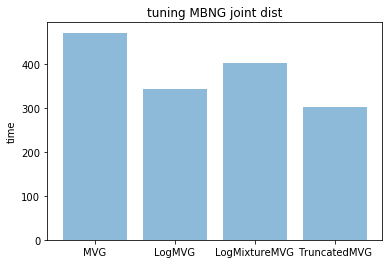

In [540]:
objects = ('MVG','LogMVG', 'LogMixtureMVG','TruncatedMVG')
y_pos = np.arange(len(objects))
performance = np.array([471.28,343.69,403.32,303.21])#taken from scattered outputs

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('time')
plt.title('tuning MBNG joint dist')

plt.savefig("dist_tune.svg")

plt.show()

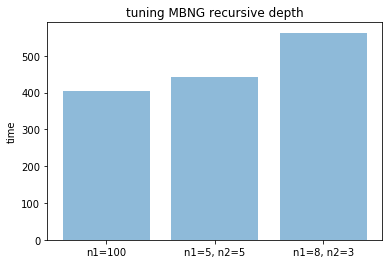

In [548]:
objects = ('n1=100','n1=5, n2=5','n1=8, n2=3')
y_pos = np.arange(len(objects))
performance = [np.mean(np.delete(w1,3)),np.mean(np.delete(w2[:,0],3)),np.mean(np.delete(w3[:,0],3))]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('time')
plt.title('tuning MBNG recursive depth')

#plt.savefig("recursive_depth.svg")

plt.show()

In [536]:
performance

array([323.32, 363.29, 482.55])

In [41]:
Bs = np.array([],dtype=int)
bs = []

In [61]:
mMVG3(Bs,bs)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


('explore', 9)

In [290]:
%run ddqn.ipynb

mDDQN = ddqn_get_model(train_data)
DDQN_clf_r = results(mDDQN,clf_data)
_,DDQN_f1 = mDDQN(np.array([],dtype=int),[])

clf_DDQN = clf.get_clf(clf_data,DDQN_clf_r, DDQN_f1)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 0, Reward: -1201.0, avg loss: 0.000, eps: 1.000
Episode: 1, Reward: -546.47, avg loss: 0.000, eps: 0.999
Episode: 2, Reward: -1202.46, avg loss: 0.000, eps: 0.998
Episode: 3, Reward: -1203.65, avg loss: 0.000, eps: 0.996
Episode: 4, Reward: -204.25, avg loss: 0.000, eps: 0.994
Episode: 5, Reward: -12.3, avg loss: 0.000, eps: 0.993
Episode: 6, Reward: -1207.42, avg loss: 0.000, eps: 0.989
Episode: 7, Reward: -1205.57, avg loss: 0.000, eps: 0.988
Episode: 8, Reward: -1201.0, avg loss: 0.000, eps:

Episode: 123, Reward: -1201.02, avg loss: 15282736.428, eps: 0.883
Episode: 124, Reward: -1205.74, avg loss: 35892838.448, eps: 0.881
Episode: 125, Reward: -1201.27, avg loss: 63484346.000, eps: 0.881
Episode: 126, Reward: -1201.0, avg loss: 1796049.875, eps: 0.880
Episode: 127, Reward: -18.28, avg loss: 24735750.785, eps: 0.879
Episode: 128, Reward: -22.62, avg loss: 31791262.081, eps: 0.877
Episode: 129, Reward: -1203.12, avg loss: 3618970.688, eps: 0.876
Episode: 130, Reward: -739.63, avg loss: 12000920.650, eps: 0.874
Episode: 131, Reward: -1203.62, avg loss: 4399335.913, eps: 0.872
Episode: 132, Reward: -1201.0, avg loss: 3710706.750, eps: 0.872
Episode: 133, Reward: -53.73, avg loss: 15195315.000, eps: 0.872
Episode: 134, Reward: -1201.0, avg loss: 1137301.750, eps: 0.871
Episode: 135, Reward: -1201.0, avg loss: 1179187.750, eps: 0.871
Episode: 136, Reward: -1201.05, avg loss: 28252127.000, eps: 0.870
Episode: 137, Reward: -1201.0, avg loss: 25338198.000, eps: 0.869
Episode: 138,

Episode: 254, Reward: -1212.85, avg loss: 9499249.447, eps: 0.756
Episode: 255, Reward: -784.52, avg loss: 2354206.719, eps: 0.756
Episode: 256, Reward: -7.39, avg loss: 3860271.173, eps: 0.755
Episode: 257, Reward: -457.53, avg loss: 198426.281, eps: 0.754
Episode: 258, Reward: -1209.28, avg loss: 1984254.525, eps: 0.752
Episode: 259, Reward: -1203.0, avg loss: 2100561.062, eps: 0.751
Episode: 260, Reward: -3.19, avg loss: 373277.703, eps: 0.750
Episode: 261, Reward: -70.42, avg loss: 2256490.573, eps: 0.749
Episode: 262, Reward: -319.71, avg loss: 5344283.000, eps: 0.748
Episode: 263, Reward: -1201.0, avg loss: 89097136.000, eps: 0.748
Episode: 264, Reward: -1201.0, avg loss: 298454.625, eps: 0.747
Episode: 265, Reward: -1203.01, avg loss: 20679555.906, eps: 0.747
Episode: 266, Reward: -1203.08, avg loss: 11389942.000, eps: 0.745
Episode: 267, Reward: -4.58, avg loss: 2097582.548, eps: 0.744
Episode: 268, Reward: -1201.0, avg loss: 1659439.125, eps: 0.744
Episode: 269, Reward: -8.32,

Episode: 383, Reward: -1203.88, avg loss: 128990.312, eps: 0.643
Episode: 384, Reward: -1209.58, avg loss: 64389301.973, eps: 0.642
Episode: 385, Reward: -1203.66, avg loss: 31718.506, eps: 0.641
Episode: 386, Reward: -32.37, avg loss: 1970990.113, eps: 0.640
Episode: 387, Reward: -1201.0, avg loss: 845344.188, eps: 0.640
Episode: 388, Reward: -1207.35, avg loss: 6849851.766, eps: 0.638
Episode: 389, Reward: -1134.4, avg loss: 13352889.125, eps: 0.637
Episode: 390, Reward: -1207.37, avg loss: 4359497.438, eps: 0.636
Episode: 391, Reward: -1201.0, avg loss: 17903902.000, eps: 0.635
Episode: 392, Reward: -1201.0, avg loss: 25079.934, eps: 0.635
Episode: 393, Reward: -1209.11, avg loss: 212761183.150, eps: 0.632
Episode: 394, Reward: -56.93, avg loss: 12188419.000, eps: 0.632
Episode: 395, Reward: -1204.47, avg loss: 8871898.250, eps: 0.632
Episode: 396, Reward: -1201.0, avg loss: 6700988.500, eps: 0.631
Episode: 397, Reward: -1225.23, avg loss: 55525450.250, eps: 0.631
Episode: 398, Rewa

Episode: 509, Reward: -1212.07, avg loss: 19058488.408, eps: 0.532
Episode: 510, Reward: -1203.02, avg loss: 18087772.000, eps: 0.532
Episode: 511, Reward: -1203.06, avg loss: 1182457.531, eps: 0.531
Episode: 512, Reward: -1225.1, avg loss: 8494050.650, eps: 0.530
Episode: 513, Reward: -592.12, avg loss: 61321884.250, eps: 0.529
Episode: 514, Reward: -29.48, avg loss: 14261851.375, eps: 0.528
Episode: 515, Reward: -88.74000000000001, avg loss: 2747715.100, eps: 0.526
Episode: 516, Reward: -1201.0, avg loss: 6182827.000, eps: 0.526
Episode: 517, Reward: 4607.610000000001, avg loss: 6531176.037, eps: 0.523
Episode: 518, Reward: -136.31, avg loss: 1675941.898, eps: 0.522
Episode: 519, Reward: -1203.11, avg loss: 12412695.109, eps: 0.521
Episode: 520, Reward: -2186.9399999999996, avg loss: 73533173.057, eps: 0.519
Episode: 521, Reward: -1203.18, avg loss: 23256630.000, eps: 0.518
Episode: 522, Reward: -231.23, avg loss: 36372368.375, eps: 0.517
Episode: 523, Reward: -20.44, avg loss: 11422

Episode: 630, Reward: -1214.66, avg loss: 55496305.812, eps: 0.410
Episode: 631, Reward: -257.16, avg loss: 551216612.350, eps: 0.409
Episode: 632, Reward: -682.0699999999999, avg loss: 1032312989.333, eps: 0.408
Episode: 633, Reward: -1201.0, avg loss: 103307424.000, eps: 0.408
Episode: 634, Reward: -1205.59, avg loss: 1971981242.750, eps: 0.408
Episode: 635, Reward: -1201.0, avg loss: 1049465344.000, eps: 0.407
Episode: 636, Reward: -1205.66, avg loss: 336090119.833, eps: 0.407
Episode: 637, Reward: -2.5, avg loss: 84435960.000, eps: 0.406
Episode: 638, Reward: -364.28, avg loss: 453192859.667, eps: 0.406
Episode: 639, Reward: 505.96, avg loss: 49002490.083, eps: 0.405
Episode: 640, Reward: -1230.03, avg loss: 186690597.568, eps: 0.403
Episode: 641, Reward: -1231.85, avg loss: 78072840.861, eps: 0.401
Episode: 642, Reward: -547.05, avg loss: 1733960576.000, eps: 0.401
Episode: 643, Reward: -1217.18, avg loss: 592486000.789, eps: 0.400
Episode: 644, Reward: -441.25, avg loss: 13972882

Episode: 757, Reward: -1201.0, avg loss: 3486783.000, eps: 0.306
Episode: 758, Reward: -8.71, avg loss: 331611450.966, eps: 0.304
Episode: 759, Reward: -16.4, avg loss: 72065184.330, eps: 0.303
Episode: 760, Reward: -15.09, avg loss: 57744732.267, eps: 0.301
Episode: 761, Reward: -712.39, avg loss: 23583958.000, eps: 0.301
Episode: 762, Reward: -41.23, avg loss: 873225.062, eps: 0.301
Episode: 763, Reward: -1235.42, avg loss: 251079632.275, eps: 0.299
Episode: 764, Reward: -1207.2, avg loss: 492816769.250, eps: 0.299
Episode: 765, Reward: -1203.27, avg loss: 12274697.750, eps: 0.298
Episode: 766, Reward: -1207.47, avg loss: 18834976.938, eps: 0.297
Episode: 767, Reward: -701.72, avg loss: 61083202.667, eps: 0.297
Episode: 768, Reward: -434.17, avg loss: 155419455.617, eps: 0.296
Episode: 769, Reward: -33.95, avg loss: 17152084.300, eps: 0.295
Episode: 770, Reward: -1207.75, avg loss: 11835821.738, eps: 0.293
Episode: 771, Reward: -287.69, avg loss: 179926643.977, eps: 0.292
Episode: 77

Episode: 879, Reward: -1208.72, avg loss: 15361184.917, eps: 0.215
Episode: 880, Reward: -1227.17, avg loss: 53975615.750, eps: 0.215
Episode: 881, Reward: 1536.0, avg loss: 7206998.188, eps: 0.214
Episode: 882, Reward: -745.24, avg loss: 66154926.051, eps: 0.213
Episode: 883, Reward: -1203.02, avg loss: 1671999.625, eps: 0.213
Episode: 884, Reward: -1213.88, avg loss: 11536455.955, eps: 0.212
Episode: 885, Reward: -1201.0, avg loss: 1077987.375, eps: 0.212
Episode: 886, Reward: -533.75, avg loss: 55541305.364, eps: 0.211
Episode: 887, Reward: -1253.57, avg loss: 222603985.159, eps: 0.210
Episode: 888, Reward: -1209.23, avg loss: 5345841.044, eps: 0.209
Episode: 889, Reward: -213.36999999999998, avg loss: 53852247.083, eps: 0.209
Episode: 890, Reward: -4.41, avg loss: 40823687.163, eps: 0.209
Episode: 891, Reward: -61.12, avg loss: 31473946.977, eps: 0.207
Episode: 892, Reward: -1205.24, avg loss: 15091833.729, eps: 0.207
Episode: 893, Reward: -1205.19, avg loss: 3218648.312, eps: 0.20

TypeError: results() missing 1 required positional argument: 'verbose'

In [456]:
setexcoef(2.5)
r=results(mDDQN,data_all,True)

running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running
running


In [455]:
for r in w3:
    print(w3[1])

(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 0, 18])
(3.1, [7, 3, 

In [310]:
min(mp(len,r[:,1]))

2

In [457]:
r

array([[239.48, list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 18])],
       [9.62, list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 18])],
       [1212.05, list([7, 8, 4, 5, 9, 2, 1, 0, 6, 3, 6])],
       ...,
       [41.25, list([7, 8, 5, 9, 4, 2, 0, 6, 1, 3, 10])],
       [1210.2, list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 6])],
       [379.39, list([7, 9, 1, 0, 2, 8, 5, 6, 4, 3, 10])]], dtype=object)

In [551]:
np.mean(h)

303.207571251549

In [359]:
np.savetxt("ddqn1.csv",fr)

In [361]:
np.savetxt("ddqn2.csv",r[:,0])

In [349]:
r[:,1]

array([list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 18]),
       list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 18]),
       list([7, 8, 4, 5, 9, 2, 1, 0, 6, 3, 6]), ...,
       list([7, 8, 5, 9, 4, 2, 0, 6, 1, 3, 10]),
       list([7, 1, 8, 4, 0, 6, 9, 2, 5, 3, 6]),
       list([7, 9, 1, 0, 2, 8, 5, 6, 4, 3, 10])], dtype=object)

In [15]:
r2 = results()

array([(1027.1399999999999, [2, 5, 3, 7, 9, 6, 8, 4, 0, 1, 26]),
       (46.79, [2, 5, 3, 7, 6, 9, 8, 4, 0, 1, 17]),
       (12.190000000000001, [2, 5, 6, 0, 4, 3, 8, 1, 9, 7, 15]), ...,
       (1235.48, [2, 5, 6, 0, 8, 4, 9, 3, 1, 7, 24]),
       (1210.2, [2, 5, 6, 0, 8, 1, 7, 3, 4, 9, 24]),
       (143.82999999999998, [2, 5, 6, 0, 8, 4, 9, 3, 1, 7, 7])],
      dtype=object)

In [9]:
np.mean(r[:,0])

626.4766666666668

In [314]:
vs=np.arange(0,20,0.5)

In [22]:
a=np.array([[1,2],[3,4]])

In [312]:
data_all_c = data_all.copy()
np.random.shuffle(data_all_c)

In [315]:
fn = []
for v in vs:
    setexcoef(v)
    r=results(mDDQN,data_all_c[1:100],True)
    m=np.mean(r[:,0])
    fn.append(m)

In [316]:
import matplotlib.pyplot as plt

In [531]:
np.mean(fr)

319.27820941759603

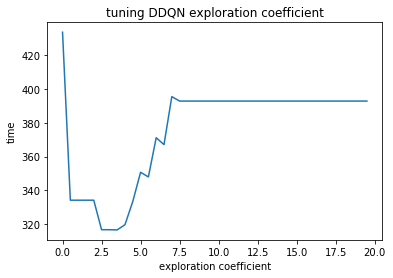

In [530]:
plt.plot(vs,np.array(fn))
plt.title("tuning DDQN exploration coefficient")
plt.xlabel("exploration coefficient")
plt.ylabel("time")
plt.savefig("ddqnexpcoef.svg")

plt.show()

In [30]:
for row in r[:,1]:
    for v in row:
        print(v,end =" ")
    print()

8 5 4 9 2 1 28 
8 1 9 5 18 
8 9 5 1 4 2 6 28 
8 28 
8 1 9 5 18 
8 5 2 7 4 1 9 6 3 0 22 
8 9 1 5 4 2 28 
8 28 
8 1 9 5 7 2 18 
8 1 9 2 5 28 
8 1 9 5 18 
8 1 9 5 4 0 22 
8 28 
8 1 9 5 28 
8 1 9 2 5 28 
8 1 9 5 4 0 22 
8 1 9 5 0 22 
8 1 9 5 28 
8 28 
8 1 9 5 18 
8 5 4 9 2 1 28 
8 9 1 5 2 4 7 6 3 0 22 
8 28 
8 1 9 2 5 28 
8 28 
8 5 7 4 2 1 9 6 0 22 
8 1 9 0 2 5 28 
8 5 22 
8 1 9 5 18 
8 1 9 5 28 
8 1 9 2 5 28 
8 1 9 2 5 7 4 18 
8 1 9 5 4 0 22 
8 1 9 5 0 22 
8 1 9 5 18 
8 5 22 
8 1 9 2 5 28 
8 1 9 5 28 
8 1 9 5 28 
8 1 9 5 18 
8 28 
8 5 4 1 2 6 9 23 
8 1 9 2 5 28 
8 28 
8 1 9 5 28 
8 28 
8 28 
8 28 
8 1 9 5 18 
8 1 9 5 28 
8 1 9 2 5 28 
8 1 9 5 18 
8 1 9 5 4 2 7 6 0 18 
8 1 9 5 18 
8 1 9 2 5 28 
8 28 
8 28 
8 5 22 
8 1 9 2 5 28 
8 1 9 5 28 
8 5 22 
8 5 18 
8 1 9 5 18 
8 28 
8 5 4 2 9 7 1 0 22 
8 5 9 4 1 28 
8 1 9 5 0 22 
8 28 
8 28 
8 1 9 5 18 
8 1 9 5 18 
8 5 4 7 9 2 1 6 3 0 22 
8 1 9 5 2 7 
8 9 1 5 18 
8 1 9 0 22 
8 1 9 2 5 28 
8 28 
8 1 9 5 18 
8 1 9 5 0 22 
8 28 
8 1 9 5 18 
8 1 9 5 18 

In [ ]:
def run_model_clf(truth, model,clf,SATzilla_t):
    Bs = np.array([],dtype=int)
    bs = []
    timesofar = 0
    first = True
    while True:
        typ, i = model(Bs,bs)
        if typ == "explore":
            Fv = Fvs[i]
            Ft = Fts[i]
            fv = truth[Fv]
            ft = truth[Ft]

            timesofar += ft
            Bs = np.concatenate((Bs,Fv,[Ft]))
            bs = np.concatenate((bs,fv,[ft]))
            
            if first==True
                first==False
            if clf(fv,ft) == "SATzilla":
                return SATzilla_t
        if typ == "exploit":
            timesofar += truth[Rts[i]]
            return timesofar

In [ ]:
our_based = results(mMVG,test_data)

In [ ]:
class_results = results(mMVG,class_data)

In [ ]:
classifier = get_classifier(class_data,class_results, 7)

In [ ]:
def overall_model(Ks,ks):
    if classifier(

In [659]:
rts=data_all[:,Rts]

In [ ]:
def getc(d,r):
    

In [684]:
def doinst(RTS):
    ts = np.zeros(len(rts[0]))
    for i in range(len(dec)):
        besti = dec[i]
        ts[besti] += dt
        if ts[besti] >= RTS[besti]:
            return i
    return "error"

In [686]:
RTSall = data_all[:,Rts]

0

In [725]:
gswitch = mp(doinst,RTSall)

In [ ]:
398.4473358116481

In [726]:
np.mean(gswitch)

391.13568773234203

In [713]:
def pfirst(p,a):
    i = int(np.round(p*len(a)))
    return a[0:i]

In [714]:
pfirst(0.5,np.array([1,2,3,4,5,6]))

array([1, 2, 3])

In [745]:
funcboi(0.15)

325
[  0.   0.   0.  38.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 126.   0. 834.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   2.]


377.9801734820322

In [747]:
zw=dec

In [748]:
np.savetxt("switch.csv",zw)

In [749]:
def funcboi(p):
    global dt, dec
    dt=0.1
    ts = np.zeros(len(rts[0]))
    dec = []
    while True:
        candidates = select(lambda arts : (arts>ts).all(), rts)
        if len(candidates)==0:
            break
        besti = np.argmin(np.mean(pfirst(p,np.sort(candidates,axis=0)),axis=0)-ts)
        ts[besti]+=dt
        dec.append(besti)
        if len(dec)%1000==0:
            print(len(candidates))
            print(ts)
    gswitch = mp(doinst,RTSall)
    return np.mean(gswitch)


In [732]:
def irang(a,b,d):
    return np.arange(a,b+d,d)

In [750]:
ps = irang(0.1,1,0.01)
res=mp(funcboi,ps)

766
[ 0.  19.7 22.5  0.   0.   0.   0.   0.  38.8  0.   0.   0.   0.   0.
  0.   0.  17.6  0.   1.4  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. ]
631
[ 0.  19.7 52.6  0.   0.   0.   0.   0.  38.8  0.   0.   0.   0.   0.
  0.   0.  27.1  4.7 56.7  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.4]
554
[  0.   19.7 112.2   0.    0.    0.    0.    0.   38.8   0.    0.    0.
   0.    0.    0.    0.   45.1   4.7  78.6   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.9]
489
[  0.   19.7 140.7   0.    0.    0.    0.    0.   38.8   0.    0.    0.
   0.    0.    0.    0.   55.7   4.7 139.2   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    1.2]
447
[  0.   19.7 207.6   0.    0.    0.    0.    0.   38.8   0.    0.    0.
   0.    0.    0.    0.   77.1   4.7 150.8   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    1.3]
420
[  0.   19.7 249.2   0.    0.    0.    0.    0.   38.8   0.    0.    0.
   0.    0.    0.    0.   

405
[  0.    0.    0.   42.1   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   75.2   0.  480.1   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.    1.2]
376
[  0.    0.    0.   42.1   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   95.    0.  560.2   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.    1.3]
352
[  0.    0.    0.   42.1   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  134.1   0.  620.7   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.    1.7]
333
[  0.    0.    0.   42.1   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  140.7   0.  713.9   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.    1.9]
321
[  0.    0.    0.   42.1   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  144.8   0.  809.8   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.    1.9]
310
[  0.    0.    0.   42.1   0.    0. 

344
[  0.    0.    0.   36.5   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  100.    0.  761.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    1.2]
333
[  0.    0.    0.   36.5   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  101.4   0.  859.6   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    1.2]
318
[  0.    0.    0.   36.5   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  101.4   0.  959.6   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    1.2]
304
[   0.     0.     0.    36.5    0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.   101.4    0.  1059.6    0.
    0.     0.     0.     0.     0.     0.     0.     0.     1.3    0.
    1.2]
290
[   0.     0.     0.    36.5    0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.   101.4    0.  1159.6    0.
    0.     0.     0.     0.     0.     0.     0.     0.  

388
[0.000e+00 0.000e+00 0.000e+00 1.870e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 7.060e+01 0.000e+00 6.075e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.800e+00 0.000e+00 4.000e-01]
370
[0.000e+00 0.000e+00 0.000e+00 1.870e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 7.220e+01 0.000e+00 7.058e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.800e+00 0.000e+00 5.000e-01]
355
[0.000e+00 0.000e+00 0.000e+00 1.870e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 7.520e+01 0.000e+00 8.028e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.800e+00 0.000e+00 5.000e-01]
344
[0.000e+00 0.000e+00 0.000e+00 1.870

390
[  0.    0.    0.   12.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   47.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  940.3   0.    0. ]
375
[   0.     0.     0.    12.7    0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.    47.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.  1040.3    0.
    0. ]
371
[   0.     0.     0.    12.7    0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.    47.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.  1140.3    0.
    0. ]
776
[ 0.   0.   0.   6.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 92.2  0.   0. ]
644
[  0.    0.    0.    6.9   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    9.5   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  183.6   0.    0. ]
567
[  0.

495
[  0.    0.    0.    4.2   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   23.5   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  472.3   0.    0. ]
477
[  0.    0.    0.    4.2   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   26.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  569.2   0.    0. ]
456
[  0.    0.    0.    4.2   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   26.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  669.2   0.    0. ]
441
[  0.    0.    0.    4.2   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   26.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  769.2   0.    0. ]
417
[  0.    0.    0.    4.2   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   26.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  869.2   0.    0. ]
403
[  0.    0.    0.    4.2   0.    0. 

389
[   0.     0.     0.     1.6    0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.    18.4    0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.  1180.     0.
    0. ]
792
[ 0.   0.   0.   0.7  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 99.3  0.   0. ]
669
[  0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.4   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  198.9   0.    0. ]
593
[  0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    5.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  294.3   0.    0. ]
539
[  0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   11.8   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  387.5   0.    0. ]
500
[  0.    0.    0.    0.7   0.    0. 

597
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.4   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  296.6   0.    0. ]
544
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    9.8   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  390.2   0.    0. ]
509
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   10.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  489.4   0.    0. ]
493
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   10.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  589.4   0.    0. ]
471
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   10.6   0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  689.4   0.    0. ]
450
[  0.    0.    0.    0.    0.    0. 

386
[  0.    0.    0.    0.    0.    0.    0.   15.8   0.    0.    0.    0.
   0.    0.    0.    0.   11.8   0.  972.4   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
371
[   0.     0.     0.     0.     0.     0.     0.    15.8    0.     0.
    0.     0.     0.     0.     0.     0.    11.8    0.  1072.4    0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0. ]
356
[   0.     0.     0.     0.     0.     0.     0.    15.8    0.     0.
    0.     0.     0.     0.     0.     0.    11.8    0.  1172.4    0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0. ]
789
[ 0.   0.   0.   0.   0.   0.   0.  13.3  0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.  86.7  0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0. ]
675
[  0.    0.    0.    0.    0.    0.    0.   13.3   0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  186.7   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
587
[  0.

590
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e-01 0.000e+00 2.988e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
533
[  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.    3.4   0.  395.6   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
488
[  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.    5.9   0.  493.1   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
460
[  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.    6.8   0.  592.2   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
443
[  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
   0.    0.    0.    0.    6

467
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.5   0.  596.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
451
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.5   0.  696.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
433
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.5   0.  796.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
419
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.5   0.  896.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
406
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    3.5   0.  996.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
388
[   0.     0.     0.     0.     0.  

413
[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.4   0.  998.6   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0. ]
393
[   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     1.4    0.  1098.6    0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0. ]
376
[   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     1.4    0.  1198.6    0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0. ]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.  

480
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e-01 0.000e+00 5.998e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
466
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e-01 0.000e+00 6.998e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
448
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 2.000e-01 0.000e+00 7.998e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
434
[0.000e+00 0.000e+00 0.000e+00 0.000

404
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-01 0.0000e+00
 1.0999e+03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
387
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e-01 0.0000e+00
 1.1999e+03 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   

483
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e-01 0.000e+00 5.999e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
469
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e-01 0.000e+00 6.999e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
451
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e-01 0.000e+00 7.999e+02 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]
437
[0.000e+00 0.000e+00 0.000e+00 0.000

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]
772
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
665
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 200.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
604
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 300.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
561
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 400.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]
521
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 500.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   

397
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0. 1200.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.]


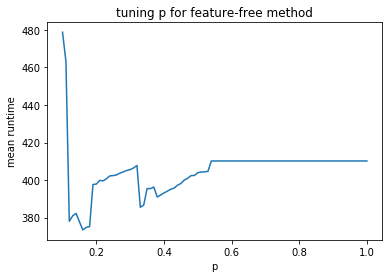

In [787]:
plt.xlabel("p")
plt.ylabel("mean runtime")
plt.title("tuning p for feature-free method")
plt.plot(ps,dt * res)
plt.savefig("featurefreep.svg")

In [782]:
ps[44]

0.5399999999999998

In [754]:
dtres = dt * res

In [755]:
ps[np.argmin(res)]

0.15999999999999998

In [756]:
funcboi(0.16)

753
[ 0.   0.   0.  21.7  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   9.4  0.  67.6  0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.3  0.   0. ]
619
[  0.    0.    0.   21.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   17.5   0.  159.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    0. ]
541
[  0.    0.    0.   21.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   37.9   0.  239.1   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    0. ]
494
[  0.    0.    0.   21.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   41.3   0.  335.7   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    0. ]
450
[  0.    0.    0.   21.7   0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.   51.5   0.  425.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    1.3   0.    0. ]
411
[0.000e+00 0.000e+00 0.000e+00 2.170e+01 0.000e+00 0.000e+00 0.000e

3734.5012391573728

In [758]:
dec

[16,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 16,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 16,
 3,
 3,
 3,
 16,
 16,
 16,
 16,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 16,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 16,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 16,
 3,
 16,
 16,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 3,
 3,
 3,
 16,
 16,
 16,
 16,
 16,
 3,
 16,
 16,
 16,
 3,
 16,
 3,
 16,
 16,
 16,
 16,
 3,
 16,
 3,
 3,
 16,
 3,
 16,
 16,
 3,
 3,
 16,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 16,
 16,
 3,
 16,
 3,
 3,
 3,
 

In [759]:
gswitch = mp(doinst,RTSall)

In [761]:
np.mean(gswitch)

3734.5012391573728

In [763]:
np.savetxt("switchtimes.csv",gswitch * dt)
np.savetxt("switchdec.csv",dec)

In [765]:
np.savetxt("rts.csv",rts)

In [789]:
np.min(res) * dt

373.4501239157373

In [790]:
(410.24-373.45)/373.45

0.09851385727674393